## Data Set and Attribute Information | Project Title: Qualitative_Bankruptcy database

Source Information

-- Data Set Creator:  Martin.A, Uthayakumar.j and Nadarajan.m (uthayakumar17691@gmail.com)
-- Guided By: Dr.V.Prasanna Venkatesan

-- Date:      February 2014

1.Past Usage: The attributes or parameters which we used for collecting the dataset is referred from the paper"The discovery of experts’ decision rules from qualitative bankruptcy data using genetic algorithms" by Myoung-Jong Kim*, Ingoo Han.

2.Number of Instances: 250

3.Number of Attributes: 6, each corresponding to Qualitative Parameters in Bankruptcy

4.Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)

a. Industrial Risk: {P,A,N}
b. Management Risk: {P,A,N}
c. Financial Flexibility: {P,A,N}
d. Credibility: {P,A,N}
e. Competitiveness: {P,A,N}
f. Operating Risk: {P,A,N}
g. Class: {B,NB}

5.Internal Risks:

i.Industry risk (IR) : 
    Government policies and International agreements, 
    Cyclicality, Degree of competition,
    The price and stability of market supply, 
    The size and growth of market demand,
    The sensitivity to changes in macroeconomic factors, 
    Domestic and international competitive power, 
    Product Life Cycle. 

ii.Management risk(MR): 
    Ability and competence of management, 
    Stability of management, 
    The relationship between management/ owner, 
    Human resources management, Growth process/business performance, 
    Short and long term business planning, achievement and feasibility. 
    
iii.Financial Flexibility(FF): 
     Direct financing, 
     Indirect financing, 
     Other financing 
     
iv.Credibility (CR):
    Credit history,
    reliability of information, 
    The relationship with financial institutes. 
  
v.Competitiveness (CO):
    Market position, 
    The level of core capacities, 
    Differentiated strategy, 
    
vi.Operating Risk (OP):
    The stability and diversity of procurement, 
    The stability of transaction, The efficiency of production, The prospects for demand for product and service, Sales diversification, Sales price and settlement condition, Collection of A/R, Effectiveness of sale network.

6.Missing Attribute Values: None

7.Class Distribution: [143 instances For Non-Bankruptcy] 
                    [107 instances For Bankruptcy]

Information about the dataset
CLASSTYPE: nominal

Following steps to be completed for the project ( 60 points)
1. Read the dataset and understand the features and target variable. 4 points
2. Encode independent features. 4 points
3. Separate the dependant variable from the rest of the train data 2 point
4. Split the dataset into training and test data ( Take 80:20 ratio). 2 points
5. Apply PCA on the independent features of train data. 2 point
6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points
7. Transform the data using PCA ( select optimum number of PCs). 4 points
8. Apply KMeans algorithm on the above transformed data. 6 points
9. Select optimal number of clusters and form clusters out of the train data. 10 points
10. Create a new column in the train data and populate it with the cluster labels. 4 points
11. Transform the test data using the same PCA object that was fit on the train data. 4 points
12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points
13. Apply SVC model on train dataset and predict target for test dataset. 6 points
14. Check accuracy and confusion matrix. 2 point

Importing Libraries

In [1]:
from sklearn import linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sts
import pandas as pd
import scipy as scp
import numpy as np
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split  ### for train and test split package
from sklearn import metrics  ## For calculation of MSE & RMSE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score


1. Reading the csv data through Pandas DataFrame

In [2]:
bankdata = pd.read_csv("Qualitative_Bankruptcy.data.txt", names =["Industrial Risk","Management Risk","Financial Flexibility","Credibility","Competitiveness","Operating Risk","Class"])

In [3]:
bankdata.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [4]:
bankdata.shape

(250, 7)

1. Finding out unique label of each column

In [5]:
for col in bankdata:
    print (col)
    print (bankdata[col].unique())

Industrial Risk
['P' 'N' 'A']
Management Risk
['P' 'N' 'A']
Financial Flexibility
['A' 'P' 'N']
Credibility
['A' 'P' 'N']
Competitiveness
['A' 'P' 'N']
Operating Risk
['P' 'N' 'A']
Class
['NB' 'B']


1. Summary of the data frame

In [6]:
bankdata.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


2. The columns are in categorical text form. For EDA purposes the data needs to be converted into numerical form using Label Encoding therefore assign all the columns name to a variable to perform Label Encoding and use FOR loop to iterate through values.

In [7]:
var = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']
var

['Industrial Risk',
 'Management Risk',
 'Financial Flexibility',
 'Credibility',
 'Competitiveness',
 'Operating Risk',
 'Class']

In [8]:
def func_labelEncoder(var,features):
    encode= LabelEncoder()
    features[var] = encode.fit_transform(features[var].astype(str))
    
for i in var:
    func_labelEncoder(i,bankdata)

In [9]:
bankdata.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


Label Encoder has transformed all the categorical data into Numerical data and this will suit for further analysis/ modelling purposes.

In [10]:
bankdata.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.996000,0.972000,0.932000,1.008000,1.140000,1.088000,0.572000
std,0.804096,0.724788,0.722123,0.791481,0.755435,0.733764,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


2. Checking for any null values.



In [11]:
bankdata.isnull().any()

Industrial Risk          False
Management Risk          False
Financial Flexibility    False
Credibility              False
Competitiveness          False
Operating Risk           False
Class                    False
dtype: bool

2. Pair plots for knowing the distribution

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


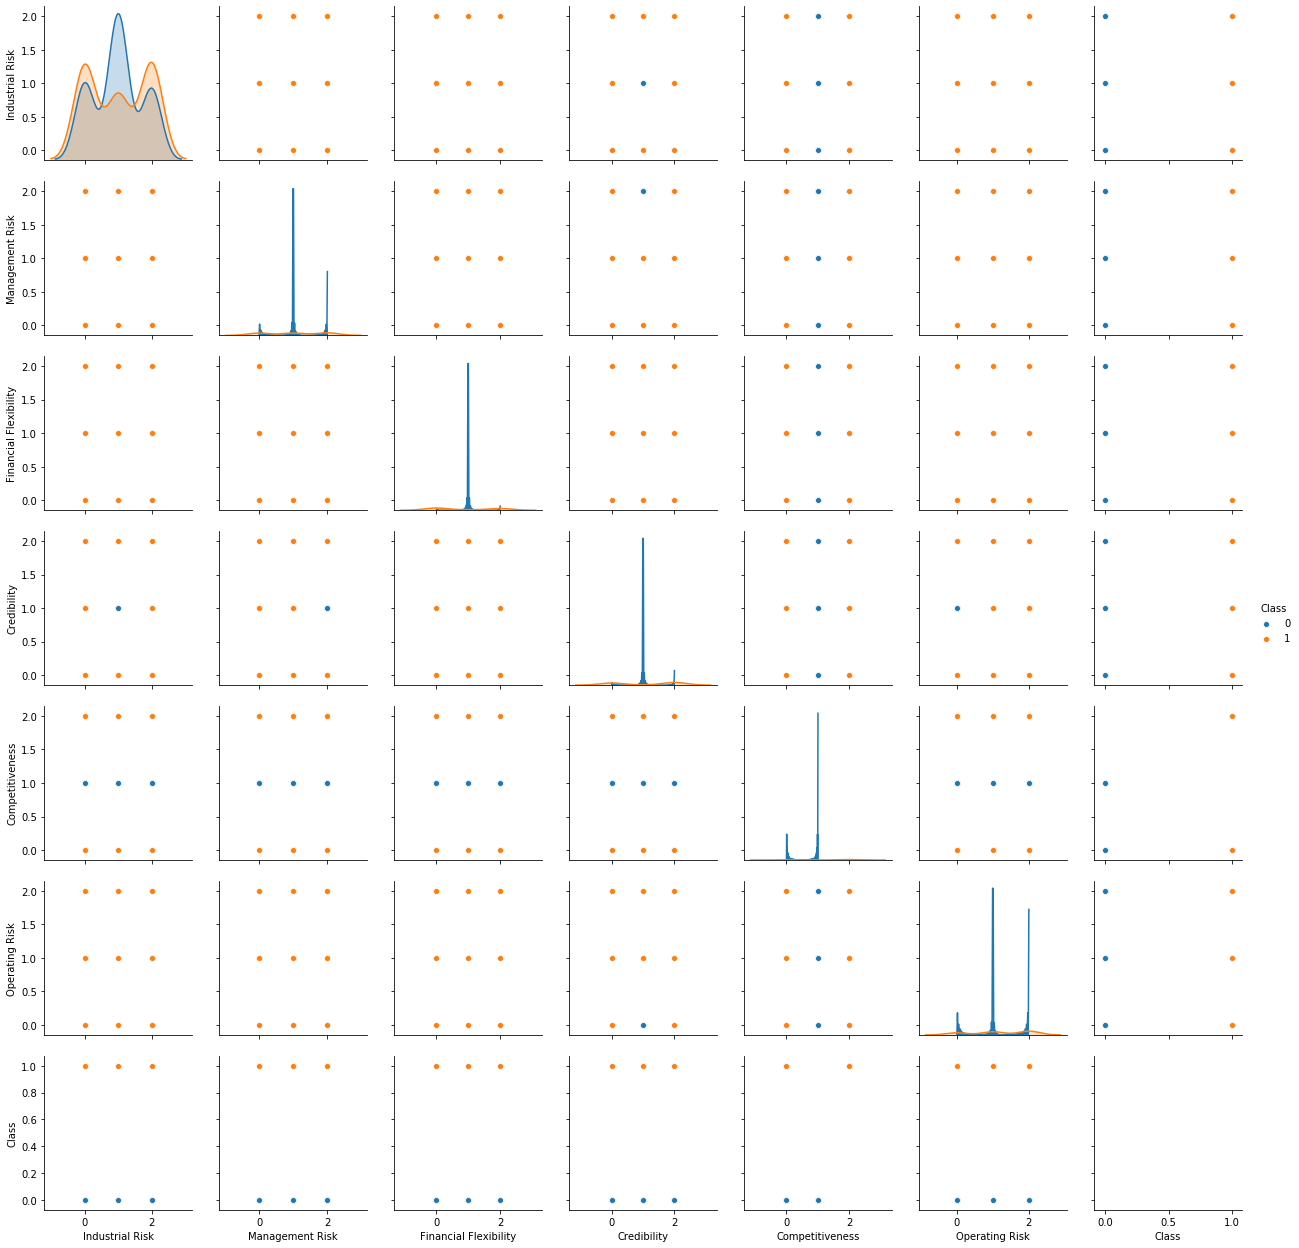

In [12]:
sns.pairplot(bankdata,diag_kind='kde',hue='Class')

2.Calculating the Correlation for each columns

In [13]:
bankdata.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
Industrial Risk,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573,0.015836
Management Risk,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851,0.100632
Financial Flexibility,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455,-0.047966
Credibility,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104,0.152045
Competitiveness,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031,0.203521
Operating Risk,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000,0.159147
Class,0.015836,0.100632,-0.047966,0.152045,0.203521,0.159147,1.000000


2. Observation - It can be seen that the correlation between different variables are between -0.5 to 0.5, therefore all variables can be considered for developing prediction model.

3. Storing the dependent variables to xVal and independent variable to yVal

In [14]:
OHE = OneHotEncoder()
xVal = OHE.fit_transform(bankdata.drop(['Class'], axis=1)).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [15]:
xVal.shape

(250, 18)

In [16]:
yVal = bankdata.Class.values.reshape(-1,1)

In [17]:
yVal.shape

(250, 1)

4. Split the whole dataset into test and train row.The train data will be 80% of the total dataset and test data will be 20% of the dataset.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(xVal,yVal, test_size=0.2, random_state=42)

In [19]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (200, 18)
X_test shape: (50, 18)
Y_train shape: (200, 1)
Y_test shape: (50, 1)


5. Applying PCA on the independent features of the Training dataset

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
var_explained = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_explained)
print("Variance Values \n" , var_explained , '\n')
print("Cummulative Variance Values \n" , cum_var_exp)

Variance Values 
 [2.66112991e-01 1.24298489e-01 9.28840777e-02 9.21414357e-02
 8.36436065e-02 7.70529029e-02 6.88195573e-02 5.83996566e-02
 5.22283593e-02 4.49984695e-02 2.61251468e-02 1.32953076e-02
 8.83328653e-33 5.00854442e-33 3.17125193e-33 1.85415005e-33
 4.55066214e-34 1.32378204e-36] 

Cummulative Variance Values 
 [0.26611299 0.39041148 0.48329556 0.57543699 0.6590806  0.7361335
 0.80495306 0.86335272 0.91558108 0.96057955 0.98670469 1.
 1.         1.         1.         1.         1.         1.        ]


In [22]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 2.28643216e-01 -1.23115578e-01 -1.05527638e-01  6.05527638e-02
  -7.33668342e-02  1.28140704e-02  1.68341709e-02 -3.01507538e-03
  -1.38190955e-02 -1.75879397e-03 -2.81407035e-02  2.98994975e-02
   2.11055276e-02 -3.36683417e-02  1.25628141e-02  4.14572864e-02
  -5.27638191e-02  1.13065327e-02]
 [-1.23115578e-01  2.28643216e-01 -1.05527638e-01 -6.00502513e-02
   8.74371859e-02 -2.73869347e-02 -2.33668342e-02  3.21608040e-02
  -8.79396985e-03 -1.75879397e-03  1.70854271e-02 -1.53266332e-02
  -2.91457286e-02  7.18592965e-02 -4.27135678e-02 -1.38190955e-02
   5.27638191e-02 -3.89447236e-02]
 [-1.05527638e-01 -1.05527638e-01  2.11055276e-01 -5.02512563e-04
  -1.40703518e-02  1.45728643e-02  6.53266332e-03 -2.91457286e-02
   2.26130653e-02  3.51758794e-03  1.10552764e-02 -1.45728643e-02
   8.04020101e-03 -3.81909548e-02  3.01507538e-02 -2.76381910e-02
  -2.62325058e-17  2.76381910e-02]
 [ 6.05527638e-02 -6.00502513e-02 -5.02512563e-04  2.04798995e-01
  -1.37487437e-

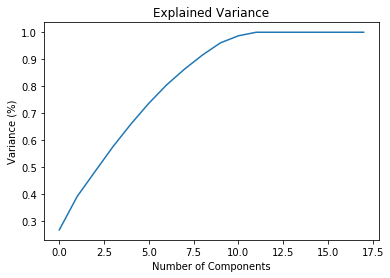

In [23]:
plt.figure()
plt.plot(cum_var_exp)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

# Appears that first 10 principal components of training data set explains more than 95 % of the variance in the data.

In [24]:
pca = PCA(n_components=10)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [26]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.12136012  0.46848434  0.02752216 -0.09298657  0.3439538  -0.26507446
   0.27080975 -0.1724765   0.17540339  0.28615327  0.10227532  0.09105935
   0.14465779  0.51153214  0.0467963  -0.03146539 -0.06492778 -0.03305746]
 [-0.18529991 -0.38029207 -0.15128748 -0.06850508 -0.20617889  0.27429203
  -0.36003979 -0.28550577  0.1949092  -0.043982    0.08888496  0.28881674
   0.14465779  0.51153214  0.0467963  -0.03146539 -0.06492778 -0.03305746]
 [ 0.06393979 -0.08819227  0.12376532  0.16149165 -0.13777491 -0.00921757
   0.08923004  0.45798226 -0.37031259 -0.24217128 -0.19116027 -0.3798761
   0.14465779  0.51153214  0.0467963  -0.03146539 -0.06492778 -0.03305746]
 [ 0.09249814  0.39144779 -0.05258801  0.17405121  0.08383641  0.39956243
  -0.41163829 -0.07417186 -0.24798552  0.21712147 -0.12369017 -0.0790951
  -0.53960495  0.24753756  0.12663085  0.03678474 -0.01602153  0.06581648]
 [-0.25145933 -0.34627316  0.01331008 -0.00183955  0.36169986 -0.24680243
   0.13330847 -0.1

In [27]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [28]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.61129914  39.041148    48.32955577  57.54369934  65.90805999
  73.61335028  80.49530601  86.33527168  91.55810761  96.05795456
  98.67046924 100.         100.         100.         100.
 100.         100.         100.        ]


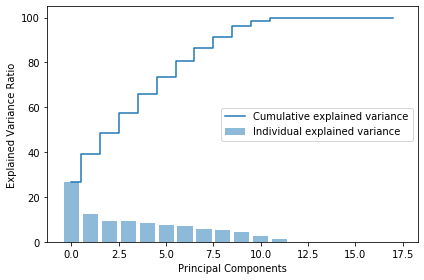

In [29]:
plt.figure(figsize=(6,4))
plt.bar(range(18), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(18), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# first 10 principal components of training data set explains more than 95 % of the variance in the data.

6-7 . Transforming all 6 PCs using standard scaler, applying k-Means clustering; 
Using elbow plot to compute required clusters.

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Let us check optimal number of clusters-
X_std = StandardScaler().fit_transform(X_train)
cluster_range = range( 1, 6)   # expect few clusters from the pair panel visual inspection hence restricting upto 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X_std)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:100]

,num_clusters,cluster_errors
0,1,3600.000000
1,2,2790.040685
2,3,2503.699446
3,4,2315.723944
4,5,2152.904830


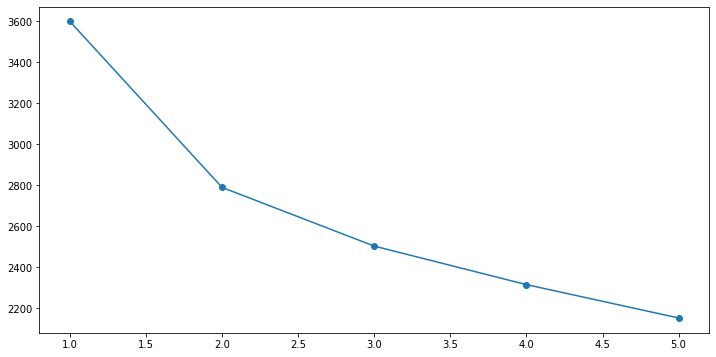

In [31]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## continuing the silhouette analysis for finding out the optimal no. of clusters

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
print(__doc__)
cluster_range = range(2, 6)
print(cluster_range)
X_std = StandardScaler().fit_transform(X_train)
y_std = Y_train
X = X_std 
y = y_std.flatten()

print(X.shape)
print(X)
type(X)
print(X.ndim)
print(y.shape)
type(y)
print(y.ndim)
print(y)

Automatically created module for IPython interactive environment
range(2, 6)
(200, 18)
[[ 1.36277029 -0.73379939 -0.65465367 ...  1.85592145 -0.90453403
  -0.69388867]
 [-0.73379939 -0.73379939  1.52752523 ... -0.53881591  1.1055416
  -0.69388867]
 [ 1.36277029 -0.73379939 -0.65465367 ... -0.53881591  1.1055416
  -0.69388867]
 ...
 [ 1.36277029 -0.73379939 -0.65465367 ...  1.85592145 -0.90453403
  -0.69388867]
 [-0.73379939  1.36277029 -0.65465367 ... -0.53881591 -0.90453403
   1.44115338]
 [-0.73379939 -0.73379939  1.52752523 ... -0.53881591  1.1055416
  -0.69388867]]
2
(200,)
1
[1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1
 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1
 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1]


For n_clusters = 2 The average silhouette_score is : 0.21700898257167275


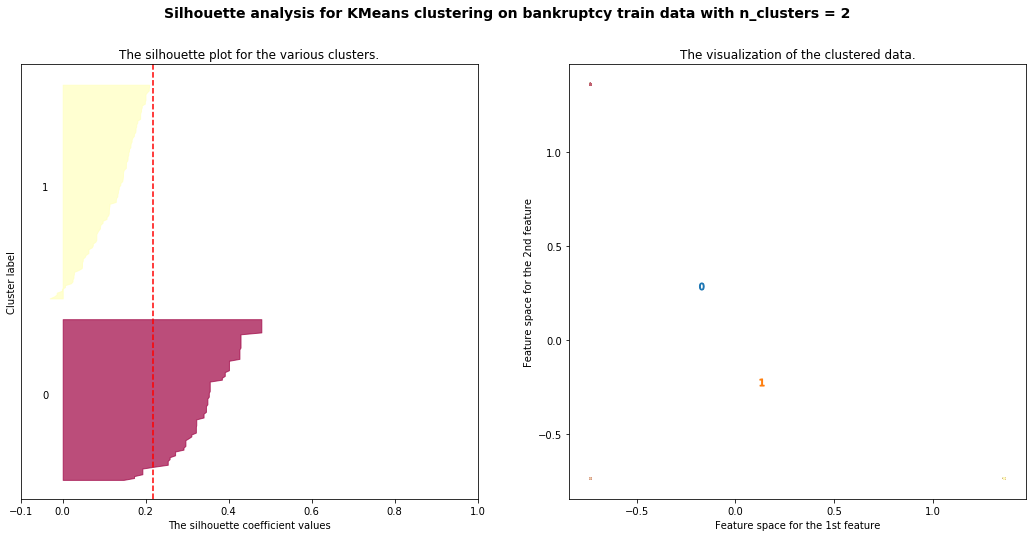

For n_clusters = 3 The average silhouette_score is : 0.22450533621787477


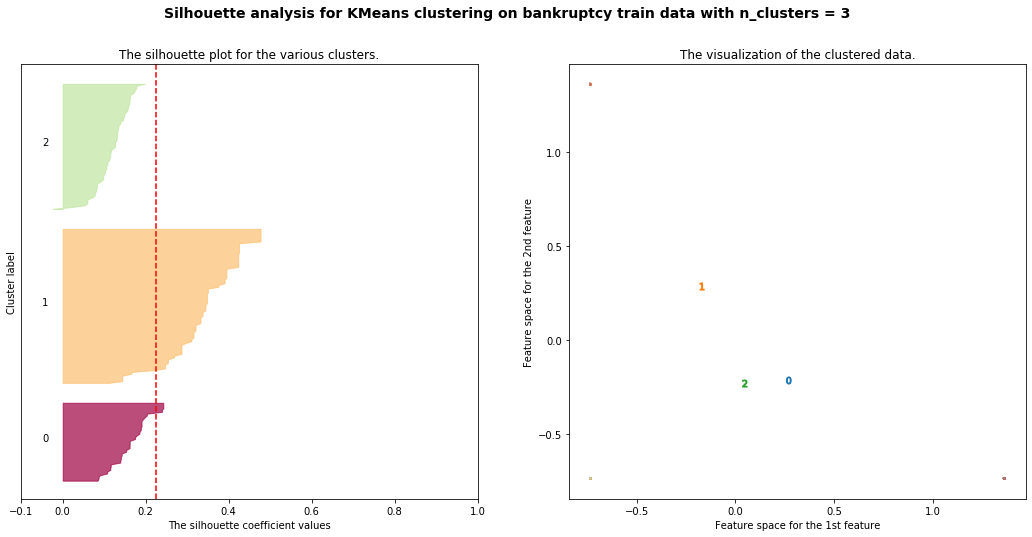

For n_clusters = 4 The average silhouette_score is : 0.22262453506027563


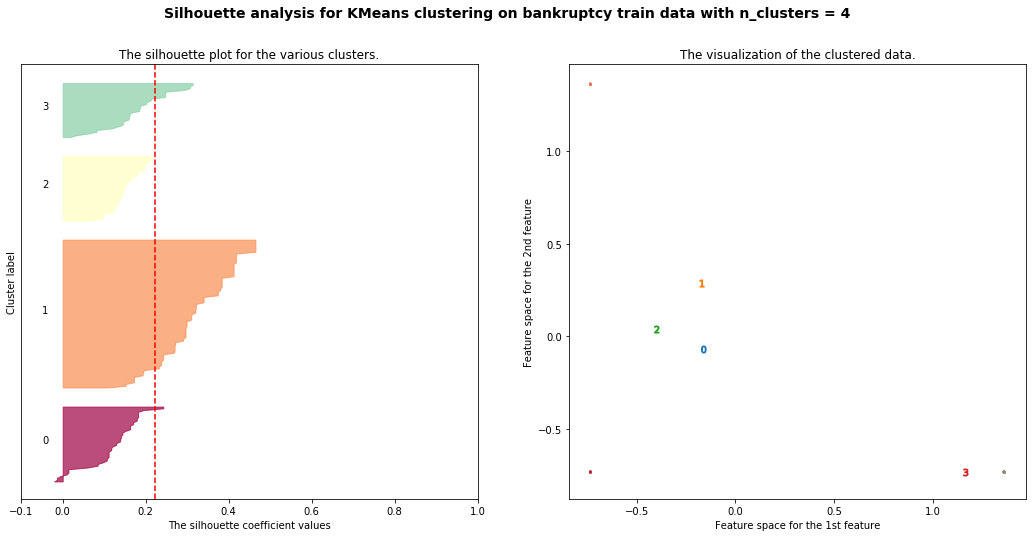

For n_clusters = 5 The average silhouette_score is : 0.21431472397535714


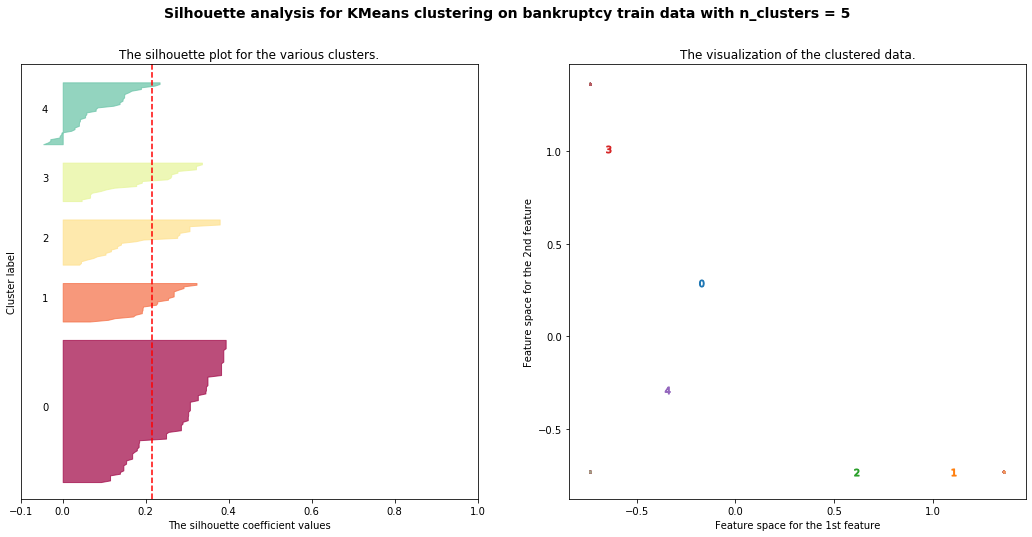

In [33]:
for n_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette 
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters, random_state=10)
    #print(clusterer)
    clusterer = clusterer.fit(X)
    clusterer_labels = clusterer.labels_     # capture the cluster lables
    
    #clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    #cluster_labels = clusterer.fit_predict(X_train)
    
    #print("For n_clusters =", n_clusters,
    #      "The clusterer_labels is :", clusterer_labels)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    
    silhouette_avg = silhouette_score(X, clusterer_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clusterer_labels)
    #print("For n_clusters =", n_clusters,
    #      "The sample silhouette_value is :", sample_silhouette_values)
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clusterer_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(clusterer_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.5,c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on bankruptcy train data "
        "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')
    plt.show()

Observation : The silhouette plot for the values of n_clusters = 3, 4 and 5 are not recommended for the given data due to wide fluctuations in the size, for the value of n_cluster=2 the plots are more or less of similar thickness.


8-9. applying k-means algo on the transformed data by selecting optimal no. of clusters derived from elbow plot and silhoutte analysis. clustering out the train data into labels.

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X_std)
# Getting the cluster labels
labels = kmeans.predict(X_std)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("sklearn")
print("Centroid values")
print(centroids) # From sci-kit learn
print("labels")
print(labels) # From sci-kit learn

sklearn
Centroid values
[[ 0.13057583 -0.21885245  0.09188122  0.10707086 -0.31112619  0.25260746
   0.41104948 -0.71495816  0.40647516  0.29017015 -0.71059315  0.45491618
   0.34177166 -0.8157806   0.535177    0.0493652  -0.23450882  0.20507641]
 [-0.17308889  0.29010673 -0.12179603 -0.14193114  0.41242309 -0.33485174
  -0.54487954  0.94773524 -0.53881591 -0.38464415  0.94194906 -0.60302843
  -0.45304616  1.08138359 -0.70942067 -0.06543759  0.31086053 -0.27184547]]
labels
[0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0
 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0]


10. creating new column in the train data and populate it with cluster labels
11. transform the test data using the PCA object
12. using k-means object, assign cluster labels to test data and storing the same in test data

In [35]:
X_train.shape

(200, 18)

In [36]:
X_train

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [37]:
labels.shape

(200,)

In [38]:
X_train=np.column_stack([X_train,labels])

In [39]:
X_train.shape

(200, 19)

In [40]:
labels = kmeans.predict(X_test)

In [41]:
X_test.shape

(50, 18)

In [42]:
labels.shape

(50,)

In [43]:
X_test=np.column_stack([X_test,labels])

In [44]:
X_test.shape

(50, 19)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(200, 10)
(50, 10)


13. applying SVC model(linear) on train data and predicting target

In [46]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14. accuracy and confusion matrix

In [47]:
# check the accuracy on the training set
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

0.99
1.0


In [48]:
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[21  0]
 [ 0 29]]


13. applying SVC model(rbf) on train data and predicting target

In [49]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


14. accuracy and confusion matrix

In [50]:
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

0.99
1.0


In [51]:
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[21  0]
 [ 0 29]]


13. applying SVC model(poly) on train data and predicting target

In [52]:
# Building a Support Vector Machine on train data
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


14. accuracy and confusion matrix

In [53]:
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

0.99
1.0


In [54]:
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[21  0]
 [ 0 29]]


13. applying SVC model(sigmoid) on train data and predicting target

In [55]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


14. accuracy and confusion matrix

In [56]:
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

0.99
1.0


In [57]:
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Confusion Matrix:
 [[21  0]
 [ 0 29]]


Observations : 
SVC demonstrates best accuracy score (for all kernels) along with the confusion matrix.    